In [ ]:
import numpy as np
import seaborn as sns

def projection(g, f):
    # проецируем g на форму f
    brightness = np.unique(f)
    for br in brightness:
        mask = np.where(f==br, 0, 1)
        g [f == br] = np.ma.array(g, mask=mask).mean()
    return g
    
def ordered_projection(g, f):
    # проецируем g на форму f с упорядоченностью яркостей
    brightness = np.unique(f)
    N = len(brightness)
    new_brightness = []
    for br in brightness:
        mask = np.where(f==br, 0, 1).astype('bool')
        new_brightness.append(np.ma.array(g, mask=mask).mean())
        
    #print(brightness)
    #print(new_brightness)
    sorted_new_brightness = sorted(new_brightness)
    index = -1
    while index >= -N and new_brightness[index] == sorted_new_brightness[index]: 
        index = index - 1
    index += 1
    small_mask = np.zeros(g.shape)
    for i in range(N+index):
        small_mask += (f==brightness[i])*1
    
    small_mask = small_mask.astype('bool')
    g[small_mask] = np.ma.array(g, mask=np.where(small_mask==1, 0, 1)).mean()
    for i in range(N+index, N):
        mask = np.where(f==brightness[i], 0, 1)
        g[f==brightness[i]] = np.ma.array(g, mask=mask).mean()
    return g
    
def E(g):
    return np.ones(g.shape)*np.mean(g)

def argmin_ord(g):
    global images
    values = []
    for i in range(0, 10):
        pr_i_g = ordered_projection(np.copy(g), np.copy(images[i]))
        values.append(np.linalg.norm(g - pr_i_g)**2/np.linalg.norm(pr_i_g - E(g))**2)
    return np.argmin(values)

def argmin(g):
    global images
    values = []
    for i in range(0, 10):
        pr_i_g = projection(np.copy(g), np.copy(images[i]))
        values.append(np.linalg.norm(g - pr_i_g)**2/np.linalg.norm(pr_i_g - E(g))**2)
    return np.argmin(values)

if __name__ == '__main__':

    images = []
    for i in range(10):
        img = plt.imread(f'images/c_{i}.png')
        images.append(img)

    sigmas = [0.01, 0.05, 0.1, 0.5, 1]
    freqs = []
    matrixes = []
    freqs_ord = []
    matrixes_ord = []

    for sigma in sigmas:
        correct_preds = 0
        matrix = np.zeros((10, 10))

        correct_preds_ord = 0
        matrix_ord = np.zeros((10, 10))
        
        for i in range(10):
            for _ in range(100):
                img_noice = images[i] + np.random.normal(0, sigma, size=(28,28))
                img_noice[img_noice>1] = 1
                img_noice[img_noice<1] = 0
                
                predict = argmin(img_noice)
                predict_ord = argmin_ord(img_noice)
                
                if predict == i:
                    correct_preds_ord += 1
                matrix_ord[i, predict] += 1

                if predict_ord == i:
                    correct_preds_ord += 1
                matrix_ord[i, predict] += 1

        
                #if i == 1 and sigma == 0.1:
                    # print('rrr')
                    # plt.imshow(np.copy(images[1]), cmap='gray')
                    # plt.show()
                    # plt.imshow(np.copy(img_noice), cmap='gray')
                    # plt.show()
                    # plt.imshow(ordered_projection(np.copy(img_noice), np.copy(images[3])), cmap='gray')
                    # plt.show()
                

            
        matrixes.append(matrix)
        freqs.append(1-correct_preds/1000)
        
        matrixes_ord.append(matrix_ord)
        freqs_ord.append(1-correct_preds_ord/1000)

    figure, axis = plt.subplots(1, 2)
    
    axis[0].set_xlabel('Сдандартное отклонение')
    axis[0].set_ylabel('Частота ошибок')
    axis[0].set_title('Зависимость частоты ошибок от стандартного отклонения')
    axis[0].grid(True, linestyle='dotted')
    axis[0].set_ylim(0, 1)
    axis[0].set_yticks(np.arange(0, 1, 0.1))
    axis[0].plot(sigmas, freqs_ord, linewidth=2, color='r')
    axis[0].plot(sigmas, freqs, linewidth=2, color='b')
    
    sns.heatmap(matrixes[-1], annot=True, fmt='g', ax=axis[1])
    axis[1].set_xlabel('Прогноз')
    axis[1].set_ylabel('Истина')
    axis[1].set_title('Матрица ошибок')

    plt.show()

/tmp/ipykernel_71522/799049265.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  values.append(np.linalg.norm(g - pr_i_g)**2/np.linalg.norm(pr_i_g - E(g))**2)


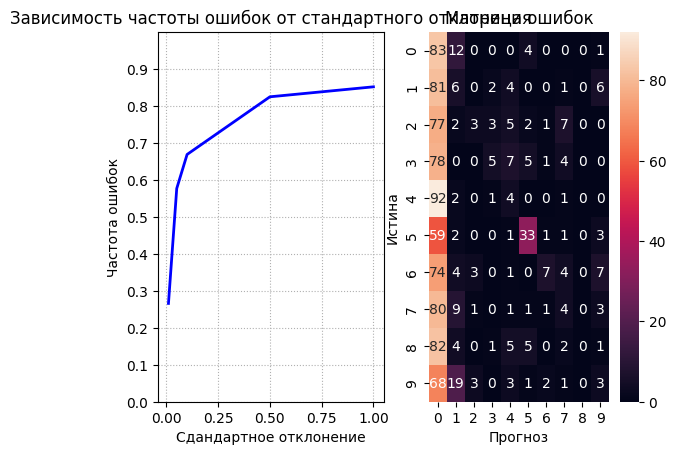

In [217]:
figure, axis = plt.subplots(1, 2)
    
axis[0].set_xlabel('Сдандартное отклонение')
axis[0].set_ylabel('Частота ошибок')
axis[0].set_title('Зависимость частоты ошибок от стандартного отклонения')
axis[0].grid(True, linestyle='dotted')
axis[0].set_ylim(0, 1)
axis[0].set_yticks(np.arange(0, 1, 0.1))

axis[0].plot(sigmas, freqs, linewidth=2, color='b')

sns.heatmap(matrixes[-1], annot=True, fmt='g', ax=axis[1])
axis[1].set_xlabel('Прогноз')
axis[1].set_ylabel('Истина')
axis[1].set_title('Матрица ошибок')

plt.show()

In [140]:
images = []
for i in range(10):
    img = plt.imread(f'images/c_{i}.png')
    images.append(img)

In [206]:
def ordered_projection(g, f):
    # проецируем g на форму f с упорядоченностью яркостей
    brightness = np.unique(f)
    N = len(brightness)
    new_brightness = []
    for br in brightness:
        mask = np.where(f==br, 0, 1).astype('bool')
        new_brightness.append(np.ma.array(g, mask=mask).mean())
        
    print(brightness)
    print(new_brightness)
    sorted_new_brightness = sorted(new_brightness)
    index = -1
    while index >= -N and new_brightness[index] == sorted_new_brightness[index]: 
        index = index - 1
    index += 1
    small_mask = np.zeros(g.shape)
    for i in range(N+index):
        small_mask += (f==brightness[i])*1
    
    small_mask = small_mask.astype('bool')
    g[small_mask] = np.ma.array(g, mask=np.where(small_mask==1, 0, 1)).mean()
    print(index)
    for i in range(N+index, N):
        mask = np.where(f==brightness[i], 0, 1)
        g[f==brightness[i]] = np.ma.array(g, mask=mask).mean()
    return g

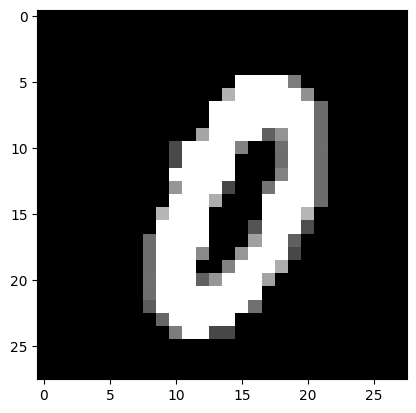

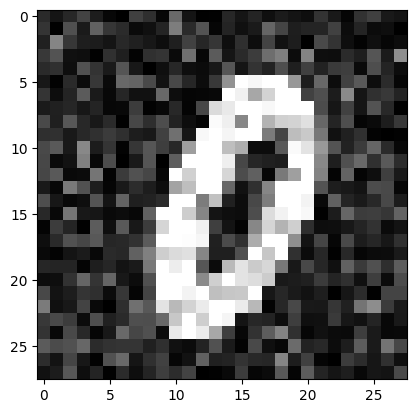

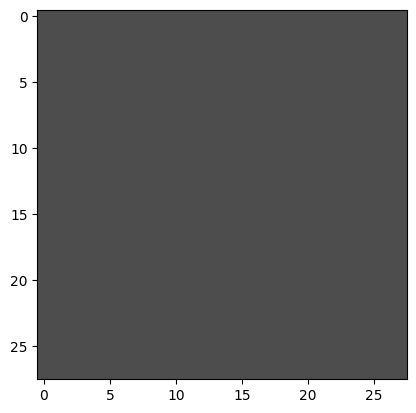

In [230]:
temp_g = np.copy(images[0])
temp_g[temp_g>0.75] = 1

temp_g[temp_g<=0.25]=0
temp_g_noise = np.abs(np.copy(images[0]) + np.random.normal(0, 0.2, size=(28,28)))
temp_g_noise[temp_g_noise>1] = 1
temp_f = np.copy(images[1])
r = ordered_projection(np.copy(temp_g_noise), np.copy(temp_g))
plt.imshow(temp_g, cmap='gray', vmax=1, vmin=0)
plt.show()
plt.imshow(temp_g_noise, cmap='gray', vmax=1, vmin=0)
plt.show()
plt.imshow(r, cmap='gray', vmax=1, vmin=0)
plt.show()

In [231]:
import random

arr = [1,2,3,4,5,6,7,8,9]
random.shuffle(arr)
print(arr)
# Создаем копию исходного массива
arr = [ 0.4, 0.2, 0.8, 0.9]
sorted_arr = sorted(arr)
print(arr, sorted_arr)
# Находим индекс, с которого элементы упорядочены
index = -1
while index >= -len(arr) and arr[index] == sorted_arr[index]: 
    print(index)
    index = index - 1


print("Индекс, с которого элементы упорядочены:", index)

[5, 6, 4, 9, 2, 7, 1, 8, 3]
[0.4, 0.2, 0.8, 0.9] [0.2, 0.4, 0.8, 0.9]
-1
-2
Индекс, с которого элементы упорядочены: -3
